# Cifar 10

In [2]:
# 라이브러리 준비
import tensorflow as tf

In [13]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 원핫 인코딩 수행
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [20]:
# 모델 생성

X = tf.keras.Input([32, 32, 3])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dense(32)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_31 (Dense)            (None, 256)               786688    
                                                                 
 batch_normalization_24 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                           

In [21]:
# 콜백함수 만들기
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        min_delta = 0, # 이보다 작게 변하면 변한다고 안할거임.
                                        patience = 10, # 이 회수(epoch)동안 개선이 없으면 끝냄
                                        restore_best_weights=True)
# 모델 학습
result = model.fit(x_train, y_train, epochs=1000, batch_size=128, validation_split=0.2, callbacks=[early])

Epoch 1/1000
313/313 [==============================] - 7s 18ms/step - loss: 1.6575 - accuracy: 0.4193 - val_loss: 1.8823 - val_accuracy: 0.3422
Epoch 2/1000
313/313 [==============================] - 5s 16ms/step - loss: 1.4163 - accuracy: 0.4972 - val_loss: 1.7919 - val_accuracy: 0.3679
Epoch 3/1000
313/313 [==============================] - 5s 17ms/step - loss: 1.3084 - accuracy: 0.5351 - val_loss: 1.8110 - val_accuracy: 0.3893
Epoch 4/1000
313/313 [==============================] - 6s 18ms/step - loss: 1.2226 - accuracy: 0.5656 - val_loss: 2.1020 - val_accuracy: 0.3150
Epoch 5/1000
313/313 [==============================] - 6s 19ms/step - loss: 1.1489 - accuracy: 0.5918 - val_loss: 2.1617 - val_accuracy: 0.3568
Epoch 6/1000
313/313 [==============================] - 6s 18ms/step - loss: 1.0836 - accuracy: 0.6165 - val_loss: 2.7240 - val_accuracy: 0.2875
Epoch 7/1000
313/313 [==============================] - 6s 20ms/step - loss: 1.0249 - accuracy: 0.6364 - val_loss: 1.6934 - val_ac

In [22]:
# 모델 평가하기
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.6838 - accuracy: 0.4322


[1.6838182210922241, 0.43220001459121704]

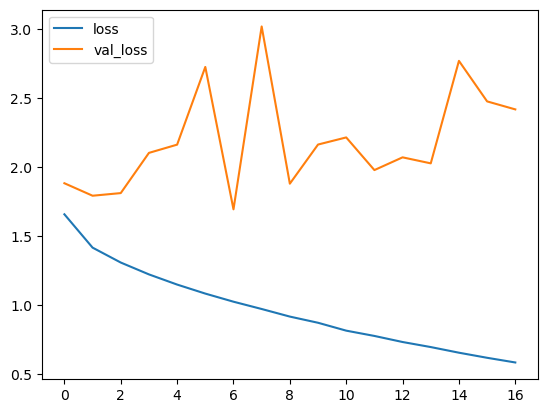

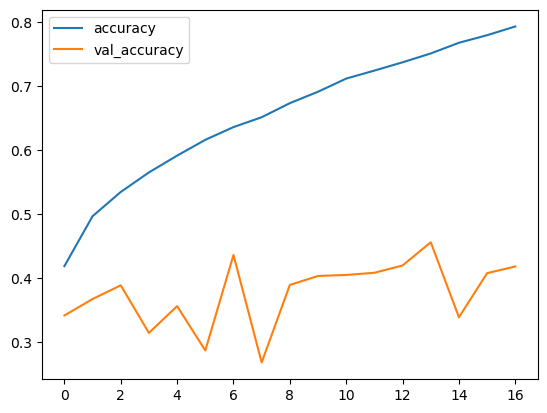

In [23]:
# 학습 시각화
import matplotlib.pyplot as plt

plt. plot(result.history['loss'])
plt. plot(result.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt. plot(result.history['accuracy'])
plt. plot(result.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()